# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/557.7 kB 6.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=4cf62c3dd5394af614fed3875cf07ffee808051802a2379483f9950b6091c45b
  Stored in directory: /Users/jonathandiaz/Library/Caches/pip/wheels/d9/dd/68/8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | tianpeng
Processing Record 6 of Set 1 | buraydah
Processing Record 7 of Set 1 | ucluelet
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | labuhan
Processing Record 11 of Set 1 | manaure
Processing Record 12 of Set 1 | conde
Processing Record 13 of Set 1 | chake chake
Processing Record 14 of Set 1 | asfi
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | oranjestad
Processing Record 19 of Set 1 | nome
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | dingle
Processing Record 22 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 23

Processing Record 42 of Set 4 | conselheiro lafaiete
Processing Record 43 of Set 4 | iberia
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | doka
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | kijang
Processing Record 49 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 0 of Set 5 | yumen
Processing Record 1 of Set 5 | tocopilla
Processing Record 2 of Set 5 | san juan
Processing Record 3 of Set 5 | naryan-mar
Processing Record 4 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 5 | peterhead
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | meadow lake
Processing Record 8 of Set 5 | chateau-thierry
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of Set 5 | safaga
Processing Record 11 of Set 5 | chulym
Processing Record 12 of Set 5 | farah
Processing Record 13 of Set 5 | khatanga
Processing Rec

Processing Record 30 of Set 8 | te anau
Processing Record 31 of Set 8 | naugachhia
Processing Record 32 of Set 8 | mergui
City not found. Skipping...
Processing Record 33 of Set 8 | plettenberg bay
Processing Record 34 of Set 8 | nalut
Processing Record 35 of Set 8 | bengkulu
Processing Record 36 of Set 8 | haibowan
City not found. Skipping...
Processing Record 37 of Set 8 | ongwediva
Processing Record 38 of Set 8 | hamilton
Processing Record 39 of Set 8 | portobelo
Processing Record 40 of Set 8 | richards bay
Processing Record 41 of Set 8 | bonoua
Processing Record 42 of Set 8 | port elizabeth
Processing Record 43 of Set 8 | kyshtovka
Processing Record 44 of Set 8 | alyangula
Processing Record 45 of Set 8 | jalu
Processing Record 46 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 47 of Set 8 | redmond
Processing Record 48 of Set 8 | verkhneuralsk
Processing Record 49 of Set 8 | andarab
City not found. Skipping...
Processing Record 0 of Set 9 | saint-augustin
Processi

Processing Record 16 of Set 12 | nelson bay
Processing Record 17 of Set 12 | fernley
Processing Record 18 of Set 12 | digras
Processing Record 19 of Set 12 | kushima
Processing Record 20 of Set 12 | warri
Processing Record 21 of Set 12 | praya
Processing Record 22 of Set 12 | puri
Processing Record 23 of Set 12 | botwood
Processing Record 24 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 25 of Set 12 | miri
Processing Record 26 of Set 12 | ola
Processing Record 27 of Set 12 | pahrump
Processing Record 28 of Set 12 | killybegs
Processing Record 29 of Set 12 | emerald
Processing Record 30 of Set 12 | aykhal
Processing Record 31 of Set 12 | xuchang
Processing Record 32 of Set 12 | moroto
Processing Record 33 of Set 12 | qaqortoq
Processing Record 34 of Set 12 | quatre cocos
Processing Record 35 of Set 12 | tura
Processing Record 36 of Set 12 | manaia
Processing Record 37 of Set 12 | port macquarie
Processing Record 38 of Set 12 | porto seguro
Processing Record 39 of Se

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,clyde river,70.4692,-68.5914,-35.87,68,75,2.57,CA,1675914935
1,arraial do cabo,-22.9661,-42.0278,23.92,88,75,1.54,BR,1675914859
2,vostok,46.4856,135.8833,-18.12,81,90,4.47,RU,1675914952
3,bredasdorp,-34.5322,20.0403,18.06,83,1,3.91,ZA,1675914823
4,tianpeng,30.9866,103.9393,11.26,78,100,1.71,CN,1675914952


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")



In [32]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clyde river,70.4692,-68.5914,-35.87,68,75,2.57,CA,1675914935
1,arraial do cabo,-22.9661,-42.0278,23.92,88,75,1.54,BR,1675914859
2,vostok,46.4856,135.8833,-18.12,81,90,4.47,RU,1675914952
3,bredasdorp,-34.5322,20.0403,18.06,83,1,3.91,ZA,1675914823
4,tianpeng,30.9866,103.9393,11.26,78,100,1.71,CN,1675914952


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

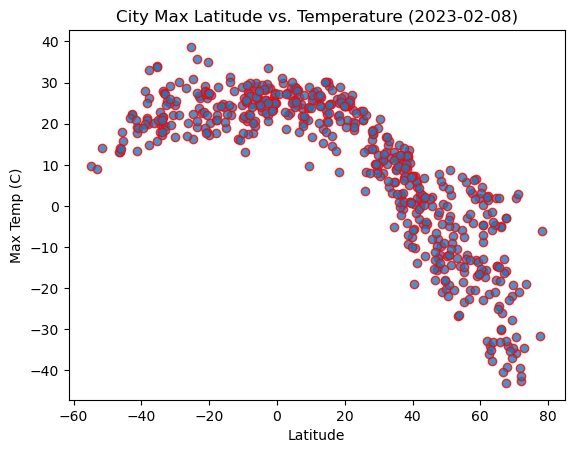

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    


)

# Incorporate the other graph properties
date= time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

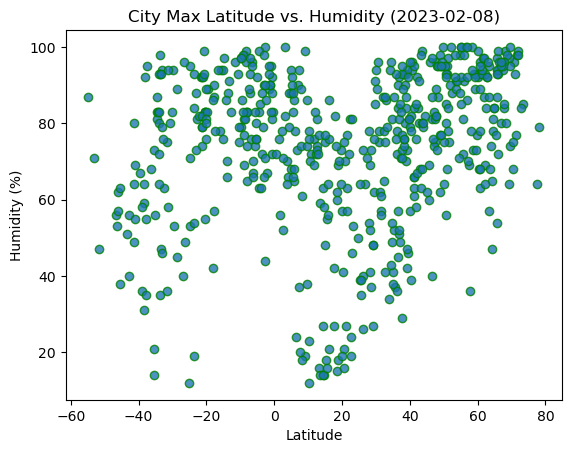

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    


)
# Incorporate the other graph properties
date= time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

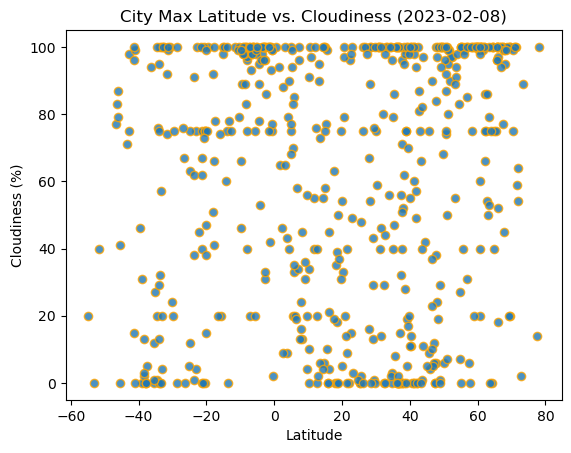

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    


)

# Incorporate the other graph properties
date= time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

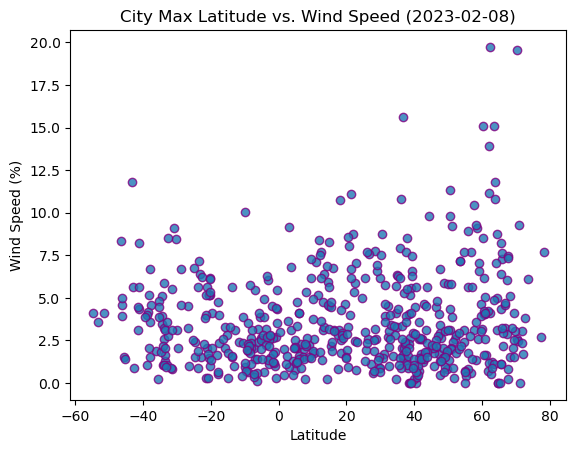

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    


)
# Incorporate the other graph properties
date= time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_value, y_value,title, text_coord):
    
    
    #compute linear regression
    (slope,intercept,rvalue,pvalue,stdeer)= linregress(x_value,y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is{rvalue **2}")
    plt.show

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clyde river,70.4692,-68.5914,-35.87,68,75,2.57,CA,1675914935
2,vostok,46.4856,135.8833,-18.12,81,90,4.47,RU,1675914952
4,tianpeng,30.9866,103.9393,11.26,78,100,1.71,CN,1675914952
5,buraydah,26.3260,43.9750,8.25,40,100,2.58,SA,1675914952
6,ucluelet,48.9329,-125.5528,4.80,95,100,5.89,CA,1675914953


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arraial do cabo,-22.9661,-42.0278,23.92,88,75,1.54,BR,1675914859
3,bredasdorp,-34.5322,20.0403,18.06,83,1,3.91,ZA,1675914823
7,atuona,-9.8000,-139.0333,26.22,79,46,10.06,PF,1675914826
8,mataura,-46.1927,168.8643,13.04,62,87,3.91,NZ,1675914639
9,labuhan,-6.8844,112.2051,28.65,76,93,5.44,ID,1675914874


###  Temperature vs. Latitude Linear Regression Plot

The r-value is0.7707896986523022


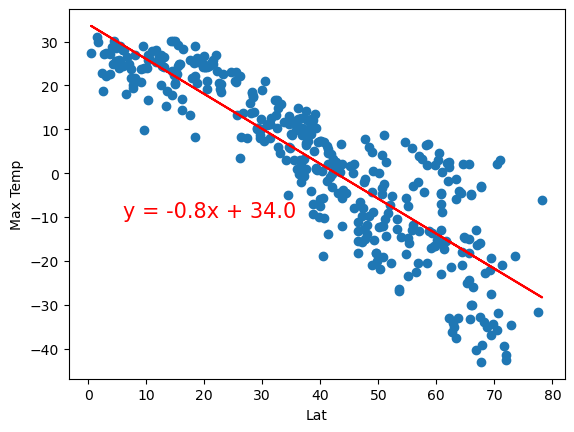

In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is0.16284720070518308


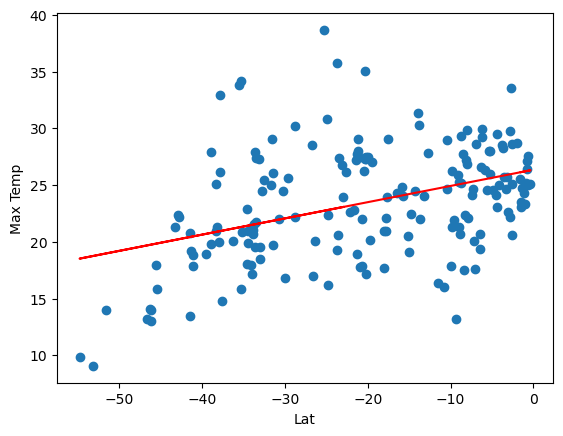

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,5))

**Discussion about the linear relationship:** Temperature progressivey decrease the further you get from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is0.19420658021872833


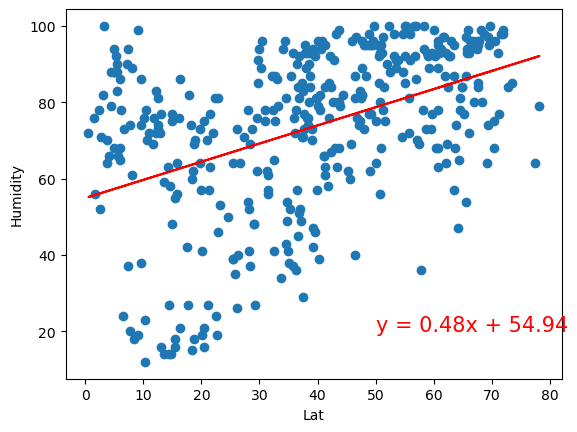

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,20))

The r-value is0.19692597271708817


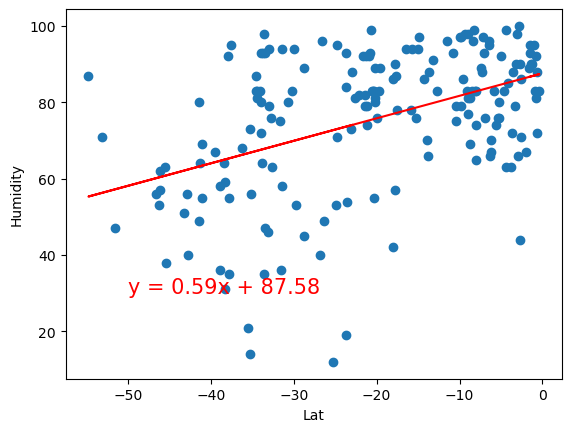

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50,30))

**Discussion about the linear relationship:** The closer you get to the equater, the temperture gradually increases

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


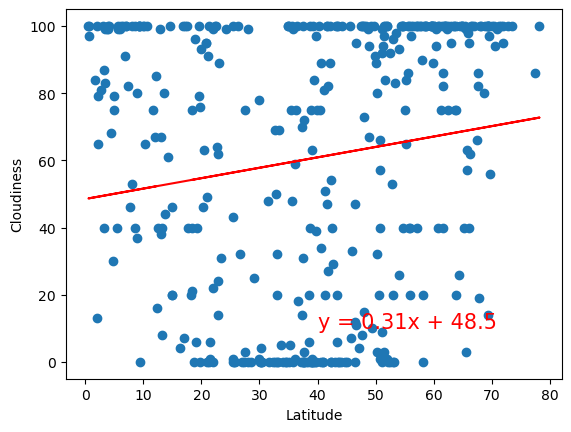

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


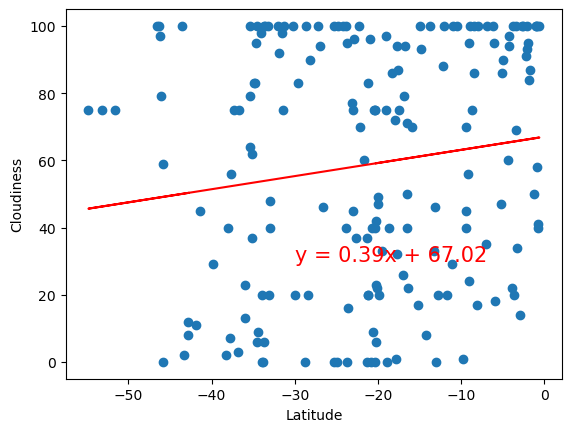

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


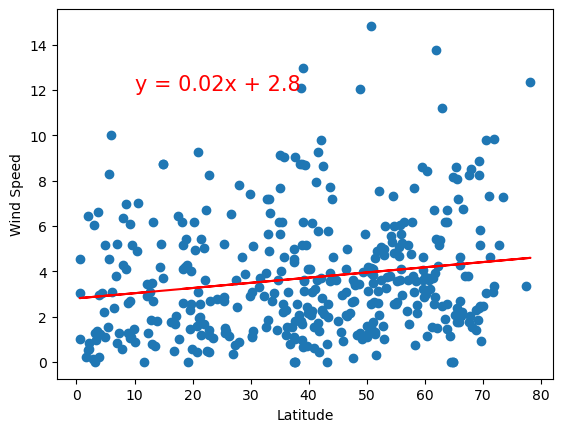

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


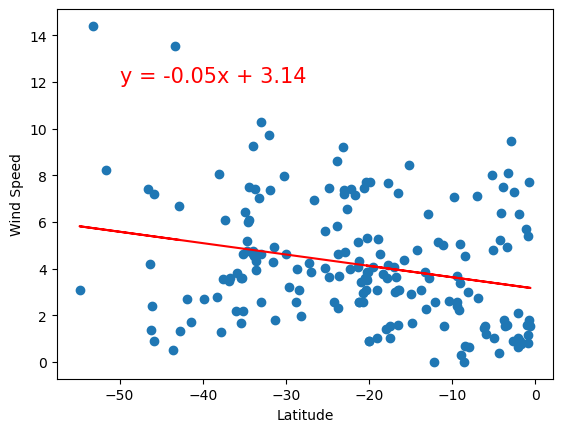

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE